DIABITICS PREDICTION 

In [17]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [18]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [19]:
import pandas as pd
df = pd.DataFrame(data.data,columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [20]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [21]:
X = df
y= data['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [23]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


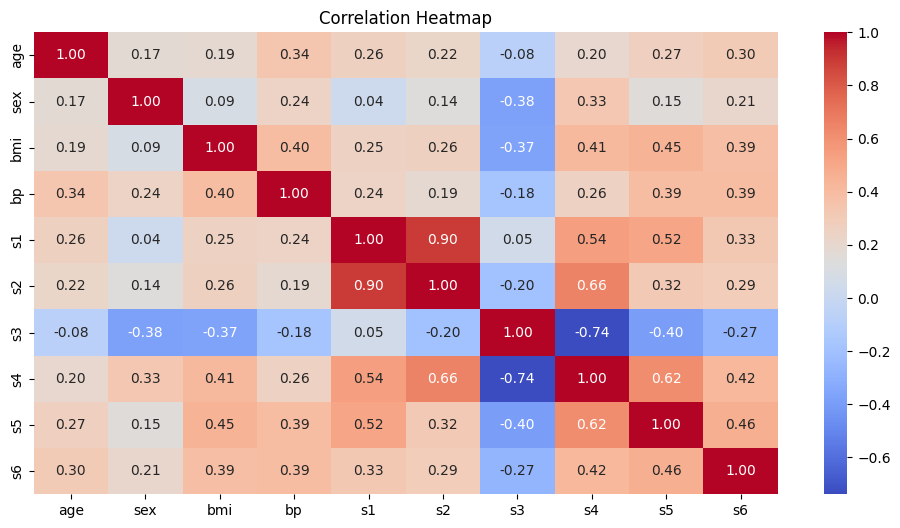

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
params = {
    'max_depth': [1,2,3,5,7,9,10,11,13,14],
    'min_samples_split': [2, 5, 10],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy']
}


In [31]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 7, 9, 10, 11, 13, 14],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_split': 2,
 'splitter': 'best'}

In [34]:
y_pred = grid_search.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [36]:
print("Best parameters found: ", grid_search.best_params_)
print("R^2 score: ", r2)
print("Mean Absolute Error: ", mae)


Best parameters found:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2, 'splitter': 'best'}
R^2 score:  0.06896936758846184
Mean Absolute Error:  54.853932584269664
